<a href="https://colab.research.google.com/github/Rudrajit12/ML_Projects/blob/main/Linear_Regression_Boston_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression.

In [152]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [153]:
# importing the dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
print("Type of boston dataset :", type(boston_data))

Type of boston dataset : <class 'sklearn.utils.Bunch'>


In [154]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [155]:
# description of the dataset
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [156]:
# loading the dataset into a dataframe
boston_df = pd.DataFrame(boston_data['data'])
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [157]:
# adding the column names
boston_df.columns = boston_data['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [158]:
# adding the dependent variable
boston_df['MEDV'] = boston_data['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [159]:
# find missing values
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


There are no missing values present in the dataset.

In [160]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### **Linear Regression Assumptions:**

  * Relation between the dependent and independent variable should be linear.
  * Mean of residuals should be close to zero as much as possible.
  * There should be homoscedasticity or equal variance present.
  * There should not be any multicollinearity between independent variables.

### **Data Preparation for Linear Regression:**

  * The relationship between the independent variables and the dependent variable must be linear. We may need to transform variables to make the relationship linear.
  * Linear regression assumes that the data is not noisy. Remove the outliers.
  * There should not be any multi-collinearity present.
  * Linear regression will make more reliable predictions if the independent variables and dependent variable have a Gaussian distribution.
  * Linear regression will often make more reliable predictions if we rescale the inputs using standardization or normalization.

### **Let us check the distribution of each variable:**

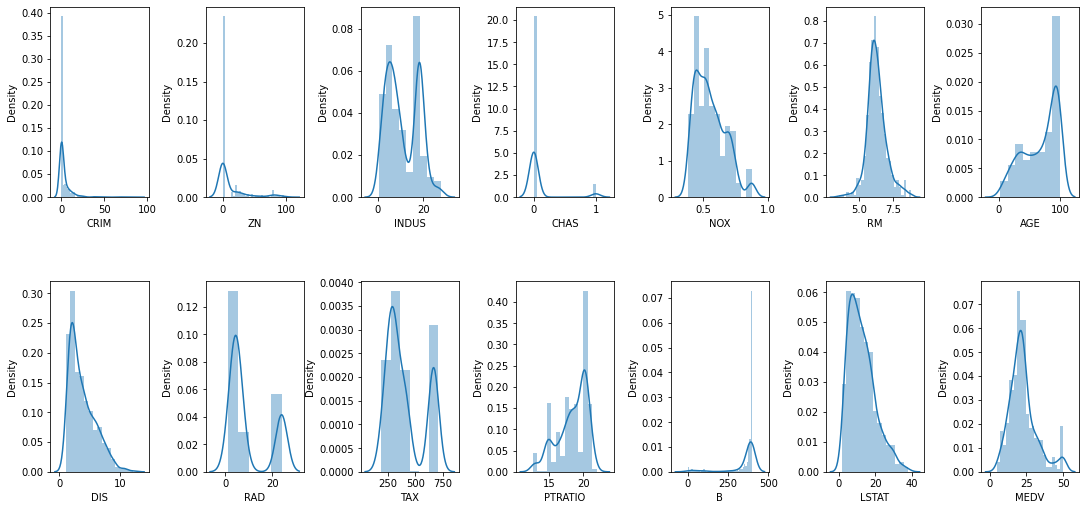

In [161]:
# plot the distribution of each variable
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15,7))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

There are few columns like CRIM, ZN, B which are heavily skewed. MEDV along with most of the other variables almost follow a normal or bimodal distribution.

### **Let us remove the outliers now:**

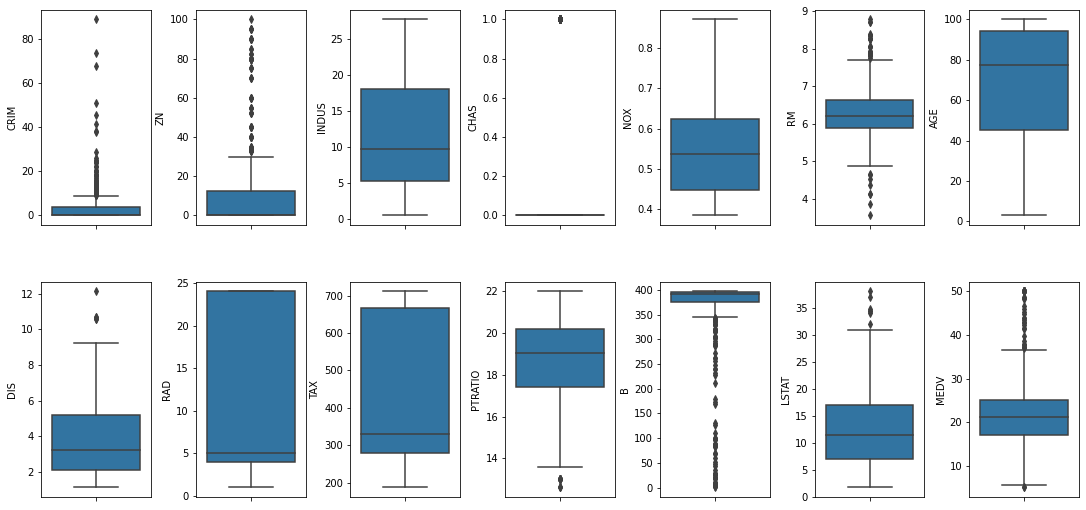

In [162]:
# Check outliers for each column
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 7))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.boxplot(y=k, data=boston_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

It seems like many columns contain outliers. Let's see the percentage of outliers in each column.

In [163]:
# print the percentages of outliers in each column
for k, v in boston_df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(boston_df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [164]:
# removing the outliers
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1

boston_df = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [165]:
boston_df.shape

(268, 14)

### **Check the pairwise correlation:**

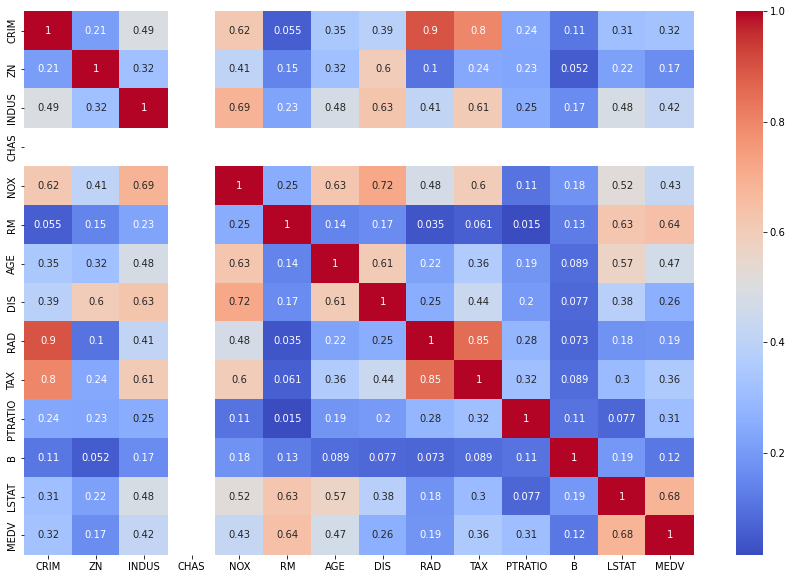

In [166]:
# check correlation
plt.figure(figsize=(15,10))
sns.heatmap(boston_df.corr().abs(),annot= True, cmap='coolwarm')

From the correlation matrix we get to know that CRIM-RAD and RAD-TAX have the highest correlations. The columns RM and LSTAT has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

We won't be using ZN, RAD, and B as predictor variables as these have very low correlation with the target variable and RAD is highly correlated with two other independent variables.

### **Check if the selected variables have a linear relation with the dependent variable or not:**

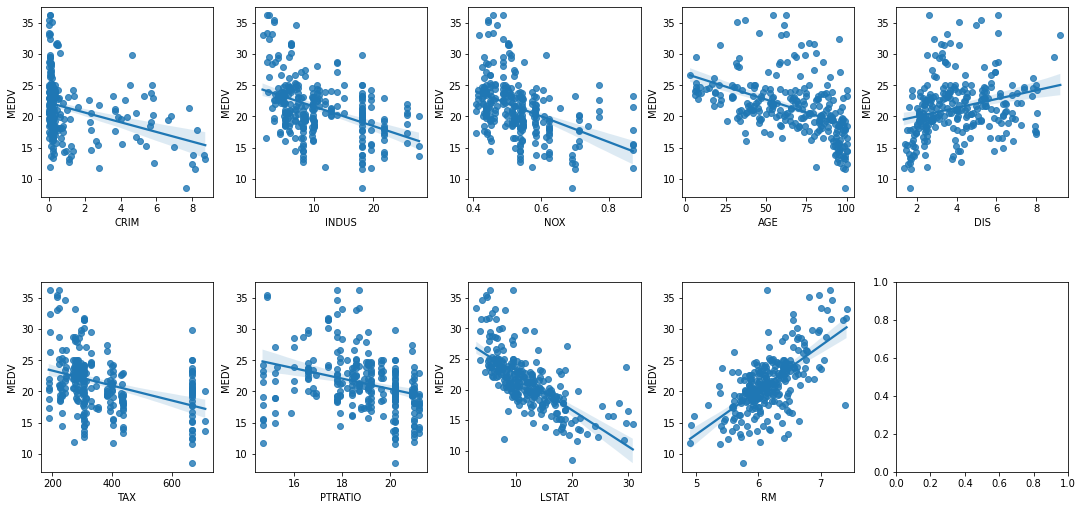

In [167]:
# Let's scale the columns before plotting them against MEDV
column = ['CRIM','INDUS','NOX','AGE','DIS','TAX','PTRATIO','LSTAT','RM']
x = boston_df.loc[:,column]
y = boston_df['MEDV']
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15, 7))
index = 0
axs = axs.flatten()
for i, k in enumerate(column):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### **Model Preparation:**

In [168]:
# considering only the important independent variables
dependent_variable = 'MEDV'
independent_variables = ['CRIM','INDUS','NOX','AGE','DIS','TAX','PTRATIO','LSTAT','RM']

# Create the data of independent variables
X = boston_df[independent_variables]

# Create the dependent variable data
Y = boston_df[dependent_variable]

# Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# transforming the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# fitting lasso regression to the training set
lasso = Lasso()
lasso.fit(X_train, Y_train)

# fitting lasso with cross validation
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, Y_train)

# fitting ridge regression to the training set
ridge = Ridge()
ridge.fit(X_train, Y_train)

# fitting ridge with cross validation
ridge_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, Y_train)

# fitting elastic net with cross validation
elastic = ElasticNet()
params = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_cv = GridSearchCV(elastic, params, scoring='neg_mean_squared_error', cv=5)
elastic_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [169]:
# prediction and evaluation
def predict_evaluate(reg):

  print(f"Evaluating for {reg}: \n")
  # train set metrics
  Y_train_pred = reg.predict(X_train)
  # test set metrics
  Y_test_pred = reg.predict(X_test)

  # func to evaluate metrics
  def print_metrics(actual, predicted):
    print('MSE is {}'.format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
    print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
    print('R2 score is {}'.format(r2_score(actual, predicted)))
    print('Adjusted R2 score is {}'.format(1 - (((len(actual) - 1)/(len(actual) - len(independent_variables) - 1)) * (1 - r2_score(actual, predicted)))))
    
  # training dataset metrics
  print("Train Set Metrics: \n")
  print_metrics(Y_train, Y_train_pred)
  print('\n')
  # testing dataset metrics
  print("Test Set Metrics: \n")
  print_metrics(Y_test, Y_test_pred)
  print('---------------------------')

### **Computing evaluation metrics for each model:**

In [170]:
# evaluate for linear regression
predict_evaluate(regressor)

Evaluating for LinearRegression(): 

Train Set Metrics: 

MSE is 6.9674497367404635
RMSE is 2.639592721754715
MAE is 1.9709092590743116
MAPE is 9.431684360465637
R2 score is 0.6801618195796142
Adjusted R2 score is 0.6660513116198913


Test Set Metrics: 

MSE is 8.092404183757154
RMSE is 2.8447151322684587
MAE is 2.0920188252190606
MAPE is 10.816280479253779
R2 score is 0.6528034355010373
Adjusted R2 score is 0.5817859563989767
---------------------------


In [171]:
# evaluate for lasso regression
predict_evaluate(lasso)

Evaluating for Lasso(): 

Train Set Metrics: 

MSE is 21.784296445104378
RMSE is 4.667365043052062
MAE is 3.464494715695694
MAPE is 17.40289646936739
R2 score is 0.0
Adjusted R2 score is -0.044117647058823595


Test Set Metrics: 

MSE is 23.657005043299918
RMSE is 4.863846733121832
MAE is 3.8623745240567664
MAPE is 19.990571202011193
R2 score is -0.01498030632905567
Adjusted R2 score is -0.22258991444181708
---------------------------


In [172]:
# evaluate for lasso cross validation
predict_evaluate(lasso_cv)

Evaluating for GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error'): 

Train Set Metrics: 

MSE is 6.992745884284145
RMSE is 2.6443800567021647
MAE is 1.9655779515401817
MAPE is 9.402230957129305
R2 score is 0.6790006093653009
Adjusted R2 score is 0.6648388715431819


Test Set Metrics: 

MSE is 8.026032966559976
RMSE is 2.8330254087388584
MAE is 2.084677778239048
MAPE is 10.751813227413436
R2 score is 0.6556510266580295
Adjusted R2 score is 0.5852160093835356
---------------------------


In [173]:
# evaluate for ridge regression
predict_evaluate(ridge)

Evaluating for Ridge(): 

Train Set Metrics: 

MSE is 7.125973006038083
RMSE is 2.669451817515739
MAE is 1.9965893308060947
MAPE is 9.514815313412623
R2 score is 0.6728848680518431
Adjusted R2 score is 0.6584533181129538


Test Set Metrics: 

MSE is 7.958039989527778
RMSE is 2.820999820901763
MAE is 2.105195039598065
MAPE is 10.805146472943255
R2 score is 0.6585681978100859
Adjusted R2 score is 0.5887298746348761
---------------------------


In [174]:
# evaluate for ridge cross validation
predict_evaluate(ridge_cv)

Evaluating for GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error'): 

Train Set Metrics: 

MSE is 7.125973006038083
RMSE is 2.669451817515739
MAE is 1.9965893308060947
MAPE is 9.514815313412623
R2 score is 0.6728848680518431
Adjusted R2 score is 0.6584533181129538


Test Set Metrics: 

MSE is 7.958039989527778
RMSE is 2.820999820901763
MAE is 2.105195039598065
MAPE is 10.805146472943255
R2 score is 0.6585681978100859
Adjusted R2 score is 0.5887298746348761
---------------------------


In [175]:
# evaluate for elastic net
predict_evaluate(elastic_cv)

Evaluating for GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error'): 

Train Set Metrics: 

MSE is 7.049162140478627
RMSE is 2.6550258267065177
MAE is 1.9767653779685992
MAPE is 9.435153969961336
R2 score is 0.6764108421751304
Adjusted R2 score is 0.6621348499181507


Test Set Metrics: 

MSE is 7.98318898617821
RMSE is 2.8254537664202206
MAE is 2.090980155413775
MAPE is 10.76583029342928
R2 score is 0.6574892050856305
Adjusted R2 score is 0.5874301788531457
---------------------------


In [177]:
models = pd.DataFrame(
    {'Metric': ['MSE','RMSE','R-Squared','Adjusted R-Squared'],
     'Linear Regression': [8.092, 2.844, 0.652, 0.581],
     'Lasso_CV': [8.026, 2.833, 0.655, 0.585],
     'Ridge_CV': [7.958, 2.820, 0.658, 0.588],
     'Elastic_Net': [7.983, 2.825, 0.657, 0.587]}
)
models

,Metric,Linear Regression,Lasso_CV,Ridge_CV,Elastic_Net
0,MSE,8.092,8.026,7.958,7.983
1,RMSE,2.844,2.833,2.820,2.825
2,R-Squared,0.652,0.655,0.658,0.657
3,Adjusted R-Squared,0.581,0.585,0.588,0.587


We can observe from all the model evaluation metrics that ridge regularization gives a better performance than other regularization methods.

The MSE can be further reduced if we apply log transformation on all the variables but at the cost of R-Squared but it is better to use R-squared value to judge the performance of a model as it is a scale free metric.